<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/tablular_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai import *
from fastai.tabular import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv')]

In [4]:
df = pd.read_csv(path/'adult.csv')
df.__dict__

{'_attrs': {}, '_data': BlockManager
 Items: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'salary'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=32561, step=1)
 FloatBlock: slice(4, 5, 1), 1 x 32561, dtype: float64
 IntBlock: [0, 2, 10, 11, 12], 5 x 32561, dtype: int64
 ObjectBlock: [1, 3, 5, 6, 7, 8, 9, 13, 14], 9 x 32561, dtype: object, '_is_copy': None, '_item_cache': {}}

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
df['age']

0        49
1        44
2        38
3        38
4        42
         ..
32556    36
32557    23
32558    53
32559    32
32560    26
Name: age, Length: 32561, dtype: int64

In [12]:
cat_names = ['workclass', 'age', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex',]
dep_var = 'salary'
cont_names = []

In [13]:
src = TabularList.from_df(df, cat_names= cat_names, cont_names= cont_names, procs = [FillMissing, Categorify, Normalize]).split_by_rand_pct().label_from_df(cols = dep_var)

In [15]:
data = src.databunch()

In [16]:
data.show_batch()

workclass,age,education,education-num,marital-status,occupation,relationship,race,sex,target
State-gov,54,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,>=50k
Private,49,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,<50k
Private,58,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,>=50k
Private,37,Masters,14.0,Separated,Exec-managerial,Not-in-family,White,Male,>=50k
Local-gov,45,HS-grad,9.0,Separated,Other-service,Unmarried,Black,Female,<50k


In [17]:
learn = tabular_learner(data, layers=[100, 200], metrics = accuracy)

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


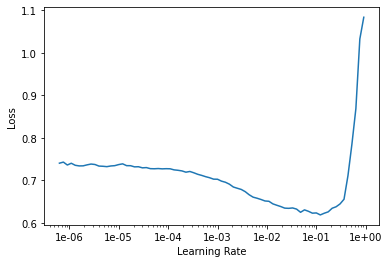

In [19]:
learn.recorder.plot()

In [23]:
learn.fit(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.399630,0.376510,0.824017,00:05
